In [1]:
# Import our dependencies

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [2]:
%matplotlib inline

In [3]:
# Import our dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [4]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import tensorflow as tf



In [5]:
# List of tickers
tickers = ['AMZN', 'MSFT', 'AAPL', 'VALE']

# Dictionary to store DataFrames
stock_data = {}

# Loop through each ticker and read the corresponding CSV file
for ticker in tickers:
    ticker_path = Path(f"../Resources/{ticker}.csv")
    stock_data[ticker] = pd.read_csv(ticker_path)
    stock_data[ticker]["Ticker"] = ticker

# Access the DataFrames using the tickers
amzn_stock = stock_data['AMZN']
msft_stock = stock_data['MSFT']
vale_stock = stock_data['VALE']
Apple_stock = stock_data['AAPL']

#Display data for AMZN
print("AMZN Data:")
print(f"MSFT :{len(msft_stock)},\n AMZN:{len(amzn_stock)},\n VALE:{len(vale_stock)},\n AAPL:{len(Apple_stock)} ")

AMZN Data:
MSFT :522,
 AMZN:501,
 VALE:522,
 AAPL:493 


In [6]:
Apple_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2022-01-03,177.830002,182.880005,177.710007,182.009995,179.953873,104487900,AAPL
1,2022-01-04,182.630005,182.940002,179.119995,179.699997,177.669968,99310400,AAPL
2,2022-01-05,179.610001,180.169998,174.639999,174.919998,172.943985,94537600,AAPL
3,2022-01-06,172.699997,175.300003,171.639999,172.000000,170.056976,96904000,AAPL
4,2022-01-07,172.889999,174.139999,171.029999,172.169998,170.225037,86709100,AAPL


In [7]:
Apple_stock.iloc[:,2:3].values

array([[182.880005],
       [182.940002],
       [180.169998],
       [175.300003],
       [174.139999],
       [172.5     ],
       [175.179993],
       [177.179993],
       [176.619995],
       [173.779999],
       [172.539993],
       [171.080002],
       [169.679993],
       [166.330002],
       [162.300003],
       [162.759995],
       [164.389999],
       [163.839996],
       [170.350006],
       [175.      ],
       [174.839996],
       [175.880005],
       [176.240005],
       [174.100006],
       [173.949997],
       [175.350006],
       [176.649994],
       [175.479996],
       [173.080002],
       [169.580002],
       [172.949997],
       [173.339996],
       [171.910004],
       [170.539993],
       [166.690002],
       [166.149994],
       [162.850006],
       [165.119995],
       [165.419998],
       [166.600006],
       [167.360001],
       [168.910004],
       [165.550003],
       [165.020004],
       [162.880005],
       [163.410004],
       [160.389999],
       [159.2

In [8]:
#Using the Open Stock Price to be our traing dataset
training_set=Apple_stock.iloc[:,2:3].values

training_set

array([[182.880005],
       [182.940002],
       [180.169998],
       [175.300003],
       [174.139999],
       [172.5     ],
       [175.179993],
       [177.179993],
       [176.619995],
       [173.779999],
       [172.539993],
       [171.080002],
       [169.679993],
       [166.330002],
       [162.300003],
       [162.759995],
       [164.389999],
       [163.839996],
       [170.350006],
       [175.      ],
       [174.839996],
       [175.880005],
       [176.240005],
       [174.100006],
       [173.949997],
       [175.350006],
       [176.649994],
       [175.479996],
       [173.080002],
       [169.580002],
       [172.949997],
       [173.339996],
       [171.910004],
       [170.539993],
       [166.690002],
       [166.149994],
       [162.850006],
       [165.119995],
       [165.419998],
       [166.600006],
       [167.360001],
       [168.910004],
       [165.550003],
       [165.020004],
       [162.880005],
       [163.410004],
       [160.389999],
       [159.2

In [9]:
#Scalling our Dataset/Normailzing the data
scaler = MinMaxScaler (feature_range=(0,1))
scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set

array([[0.76701475],
       [0.76784978],
       [0.72929718],
       [0.66151715],
       [0.64537235],
       [0.62254703],
       [0.65984687],
       [0.68768264],
       [0.67988865],
       [0.64036191],
       [0.62310365],
       [0.60278366],
       [0.5832985 ],
       [0.53667371],
       [0.48058465],
       [0.48698676],
       [0.50967297],
       [0.50201809],
       [0.59262366],
       [0.65734174],
       [0.65511483],
       [0.66958955],
       [0.67459999],
       [0.64481573],
       [0.64272792],
       [0.66221309],
       [0.68030617],
       [0.66402227],
       [0.63061943],
       [0.58190684],
       [0.62881004],
       [0.634238  ],
       [0.61433554],
       [0.59526788],
       [0.54168415],
       [0.53416838],
       [0.48823953],
       [0.51983297],
       [0.52400838],
       [0.54043159],
       [0.55100912],
       [0.57258188],
       [0.52581777],
       [0.51844131],
       [0.48865705],
       [0.49603351],
       [0.45400143],
       [0.438

In [10]:
#Setting up our features and target variables

X_train = []
y_train = []


for i in range(60,493):
    X_train.append(scaled_training_set[i-60:i,0])
    y_train.append(scaled_training_set[i,0])

    

X_train = np.array(X_train)
y_train = np.array(y_train)

In [11]:
Apple_stock.shape

(493, 8)

In [12]:
print(X_train.shape)
print(y_train.shape)

(433, 60)
(433,)


In [13]:
X_train

array([[0.76701475, 0.76784978, 0.72929718, ..., 0.66123874, 0.66750174,
        0.71315239],
       [0.76784978, 0.72929718, 0.66151715, ..., 0.66750174, 0.71315239,
        0.72150321],
       [0.72929718, 0.66151715, 0.64537235, ..., 0.71315239, 0.72150321,
        0.69951292],
       ...,
       [0.72275576, 0.67543504, 0.68629097, ..., 0.9146835 , 0.93180245,
        0.9774531 ],
       [0.67543504, 0.68629097, 0.68475999, ..., 0.93180245, 0.9774531 ,
        1.        ],
       [0.68629097, 0.68475999, 0.66012528, ..., 0.9774531 , 1.        ,
        0.98302017]])

In [14]:
y_train

array([0.72150321, 0.69951292, 0.65567167, 0.70591523, 0.70327081,
       0.63827431, 0.63451643, 0.61252614, 0.57425196, 0.58594293,
       0.60222682, 0.60542809, 0.54043159, 0.55741143, 0.57216436,
       0.60904667, 0.55810716, 0.49269314, 0.48114127, 0.44565062,
       0.51148237, 0.53486432, 0.42393876, 0.45845527, 0.53876131,
       0.50535847, 0.44077948, 0.39053592, 0.40320124, 0.38524705,
       0.25650662, 0.28295072, 0.27487832, 0.30619356, 0.27265142,
       0.19331952, 0.17995825, 0.21558801, 0.19763402, 0.19512869,
       0.23061934, 0.3049408 , 0.31858048, 0.33361181, 0.32707039,
       0.28114133, 0.28949214, 0.29547674, 0.30758523, 0.28086292,
       0.1807933 , 0.10340988, 0.08517748, 0.13319414, 0.06430066,
       0.07390404, 0.12929716, 0.13903964, 0.1505915 , 0.19679899,
       0.21878926, 0.21781491, 0.17954073, 0.14752955, 0.15685451,
       0.19262358, 0.22755739, 0.26137796, 0.27529585, 0.26263052,
       0.28782186, 0.25998609, 0.2947808 , 0.32136402, 0.33124

In [15]:
#Reshaping the dataset
X_train=np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
X_train.shape

(433, 60, 1)

In [16]:
regressor = Sequential()
regressor

In [17]:
# Adding Layers into the model 

regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [18]:
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(X_train,y_train,epochs=100,batch_size=64)


Epoch 1/100

14/14 [==============================] - 8s 47ms/step - loss: 0.0902
Epoch 2/100
14/14 [==============================] - 1s 47ms/step - loss: 0.0282
Epoch 3/100
14/14 [==============================] - 1s 47ms/step - loss: 0.0249
Epoch 4/100
14/14 [==============================] - 1s 49ms/step - loss: 0.0213
Epoch 5/100
14/14 [==============================] - 1s 54ms/step - loss: 0.0195
Epoch 6/100
14/14 [==============================] - 1s 54ms/step - loss: 0.0167
Epoch 7/100
14/14 [==============================] - 1s 55ms/step - loss: 0.0157
Epoch 8/100
14/14 [==============================] - 1s 55ms/step - loss: 0.0139
Epoch 9/100
14/14 [==============================] - 1s 54ms/step - loss: 0.0129
Epoch 10/100
14/14 [==============================] - 1s 55ms/step - loss: 0.0153
Epoch 11/100
14/14 [==============================] - 1s 55ms/step - loss: 0.0144
Epoch 12/100
14/14 [==============================] - 1s 57ms/step - loss: 0.0125
Epoch 13/100
14/14 [===

14/14 [==============================] - 1s 67ms/step - loss: 0.0043
Epoch 97/100
14/14 [==============================] - 1s 72ms/step - loss: 0.0048
Epoch 98/100
14/14 [==============================] - 1s 68ms/step - loss: 0.0047
Epoch 99/100
14/14 [==============================] - 1s 60ms/step - loss: 0.0040
Epoch 100/100
14/14 [==============================] - 1s 64ms/step - loss: 0.0041


In [19]:
# Loading the Stock Prices for Jan-2024
AAPL_ticker_test = Path("../Resources/AAPL_Test.csv")
AAPL_stock_Test = pd.read_csv(AAPL_ticker_test)
AAPL_stock_Test["Ticker"]= "AAPL_Test"  

AAPL_stock_Test.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2023-12-19,196.160004,196.949997,195.889999,196.940002,196.940002,40714100,AAPL_Test
1,2023-12-20,196.899994,197.679993,194.830002,194.830002,194.830002,52242800,AAPL_Test
2,2023-12-21,196.100006,197.080002,193.500000,194.679993,194.679993,46482500,AAPL_Test
3,2023-12-22,195.179993,195.410004,192.970001,193.600006,193.600006,37122800,AAPL_Test
4,2023-12-26,193.610001,193.889999,192.830002,193.050003,193.050003,28919300,AAPL_Test


In [20]:
#Extracting our 2024 Data for open price
actual_stock_price = AAPL_stock_Test.iloc[:,1:2].values
actual_stock_price
# actual_stock_price.shape

array([[196.160004],
       [196.899994],
       [196.100006],
       [195.179993],
       [193.610001],
       [192.490005],
       [194.139999],
       [193.899994],
       [187.149994],
       [184.220001],
       [182.149994],
       [181.990005],
       [182.089996],
       [183.919998],
       [184.350006],
       [186.539993],
       [186.059998],
       [182.160004],
       [181.270004],
       [186.089996],
       [189.330002],
       [192.300003],
       [195.020004],
       [195.419998],
       [195.220001],
       [194.270004],
       [192.009995],
       [190.940002],
       [187.039993]])

In [21]:
#Preping our Data
dataset_total=pd.concat((Apple_stock['High'],AAPL_stock_Test['High']),axis  =0)
inputs=dataset_total[len(dataset_total)-len(AAPL_stock_Test)-60:].values

inputs
inputs = inputs.reshape(-1,1)
inputs= scaler.transform(inputs)


X_test = []

for i in range(60,89):
    X_test.append(inputs[i-60:i,0])
X_test= np.array(X_test)
X_test= np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
X_test

array([[[0.68475999],
        [0.66012528],
        [0.63006259],
        ...,
        [1.        ],
        [0.98302017],
        [0.95838566]],

       [[0.66012528],
        [0.63006259],
        [0.61600561],
        ...,
        [0.98302017],
        [0.95838566],
        [0.96283928]],

       [[0.63006259],
        [0.61600561],
        [0.63048032],
        ...,
        [0.95838566],
        [0.96283928],
        [0.97299928]],

       ...,

       [[0.60027833],
        [0.64662492],
        [0.69603345],
        ...,
        [0.95490619],
        [0.95337521],
        [0.93235908]],

       [[0.64662492],
        [0.69603345],
        [0.68267239],
        ...,
        [0.95337521],
        [0.93235908],
        [0.89672932]],

       [[0.69603345],
        [0.68267239],
        [0.71899788],
        ...,
        [0.93235908],
        [0.89672932],
        [0.89116225]]])

In [22]:
actual_stock_price[1]

array([196.899994])

In [23]:
X_test[2][-1]

array([0.97299928])

In [24]:
inputs.shape

(89, 1)

In [25]:
#Predicting the Values for Jan 2024
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)


1/1 [==============================] - 2s 2s/step


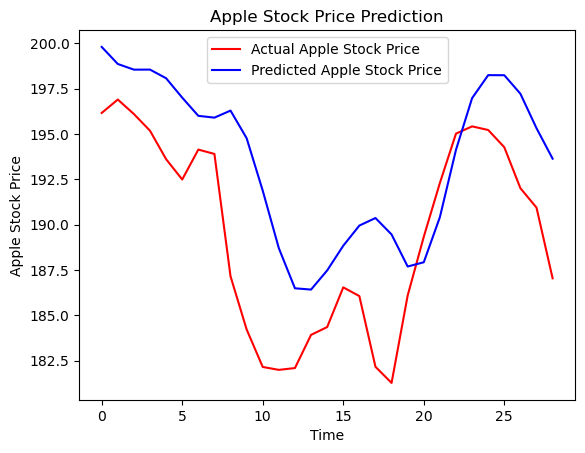

In [26]:
#Plotting the Data

plt.plot(actual_stock_price, color ='red', label ="Actual Apple Stock Price")
plt.plot(predicted_stock_price, color ='blue', label ="Predicted Apple Stock Price")
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()

In [27]:
predicted_stock_price, actual_stock_price

(array([[199.80235],
        [198.86153],
        [198.54964],
        [198.55182],
        [198.07434],
        [197.0051 ],
        [196.00078],
        [195.9019 ],
        [196.28995],
        [194.76659],
        [191.8732 ],
        [188.69992],
        [186.48938],
        [186.41873],
        [187.47293],
        [188.83656],
        [189.94879],
        [190.36502],
        [189.45804],
        [187.69014],
        [187.92526],
        [190.41183],
        [194.1277 ],
        [196.97656],
        [198.2456 ],
        [198.24188],
        [197.21991],
        [195.3201 ],
        [193.63855]], dtype=float32),
 array([[196.160004],
        [196.899994],
        [196.100006],
        [195.179993],
        [193.610001],
        [192.490005],
        [194.139999],
        [193.899994],
        [187.149994],
        [184.220001],
        [182.149994],
        [181.990005],
        [182.089996],
        [183.919998],
        [184.350006],
        [186.539993],
        [186.059998],


In [28]:
AAPL_stock_Test["Predicted Stock Price"] = predicted_stock_price
AAPL_stock_Test

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,Predicted Stock Price
0,2023-12-19,196.160004,196.949997,195.889999,196.940002,196.940002,40714100,AAPL_Test,199.802353
1,2023-12-20,196.899994,197.679993,194.830002,194.830002,194.830002,52242800,AAPL_Test,198.861526
2,2023-12-21,196.100006,197.080002,193.500000,194.679993,194.679993,46482500,AAPL_Test,198.549637
3,2023-12-22,195.179993,195.410004,192.970001,193.600006,193.600006,37122800,AAPL_Test,198.551819
4,2023-12-26,193.610001,193.889999,192.830002,193.050003,193.050003,28919300,AAPL_Test,198.074341
5,2023-12-27,192.490005,193.500000,191.089996,193.149994,193.149994,48087700,AAPL_Test,197.005096
6,2023-12-28,194.139999,194.660004,193.169998,193.580002,193.580002,34049900,AAPL_Test,196.000778
7,2023-12-29,193.899994,194.399994,191.729996,192.529999,192.529999,42628800,AAPL_Test,195.901901
8,2024-01-02,187.149994,188.440002,183.889999,185.639999,185.639999,82488700,AAPL_Test,196.289948
9,2024-01-03,184.220001,185.880005,183.429993,184.250000,184.250000,58414500,AAPL_Test,194.766586


In [29]:
predicted_stock_price.shape

(29, 1)

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
mse = mean_squared_error(AAPL_stock_Test["High"], predicted_stock_price)
mse

18.869104458072343

In [32]:
rmse = np.sqrt(mse)
rmse

4.343858245623624